# PROJECT ON HOTEL BOOKING PREDICTION

**IMPORT ALL LIBRARIES**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [30]:
from warnings import filterwarnings
filterwarnings('ignore')

**IMPORT DATA**

In [31]:
df=pd.read_csv('Downloads/BookingDetails.csv')
df.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,reservation_status
0,City Hotel,0,2017,May,5,0,1,2,0,0,...,0,0,0,A,A,No Deposit,0,Transient-Party,0,Check-Out
1,City Hotel,0,2017,April,7,0,1,1,0,0,...,0,0,0,A,A,No Deposit,0,Transient,0,Check-Out
2,City Hotel,1,2016,June,17,0,2,2,0,0,...,0,0,0,A,A,Non Refund,0,Transient,0,Canceled
3,City Hotel,0,2016,August,16,0,3,2,0,0,...,0,0,0,A,A,No Deposit,0,Transient,0,Check-Out
4,City Hotel,0,2017,August,21,1,2,2,1,0,...,0,0,0,G,G,No Deposit,0,Transient,0,Check-Out


**Explore the Data**


In [5]:
df.is_canceled.value_counts()

0    3139
1    1861
Name: is_canceled, dtype: int64

In [40]:
crosstab=pd.crosstab(index=df['children'],columns=df['is_canceled'],margins=True)
crosstab

is_canceled,0,1,All
children,,,
0,2892,1718,4610
1,148,79,227
2,96,64,160
3,3,0,3
All,3139,1861,5000


In [43]:
from scipy.stats import chi2_contingency
res=chi2_contingency(crosstab)
res[1]

0.9416486259116559

In [37]:
df['is_canceled']=df['is_canceled'].astype('O')

In [6]:
df.shape

(5000, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           5000 non-null   object
 1   is_canceled                     5000 non-null   int64 
 2   arrival_date_year               5000 non-null   int64 
 3   arrival_date_month              5000 non-null   object
 4   arrival_date_day_of_month       5000 non-null   int64 
 5   stays_in_weekend_nights         5000 non-null   int64 
 6   stays_in_week_nights            5000 non-null   int64 
 7   adults                          5000 non-null   int64 
 8   children                        5000 non-null   int64 
 9   babies                          5000 non-null   int64 
 10  meal                            5000 non-null   object
 11  country                         5000 non-null   object
 12  distribution_channel            5000 non-null   

**CHECK THE MISSING VALUES**

In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
reservation_status                0
dtype: int64

In [9]:
df['is_canceled']=df['is_canceled'].astype('object')
df['is_repeated_guest']=df['is_repeated_guest'].astype('object')
df['required_car_parking_spaces']=df['required_car_parking_spaces'].astype('object')


**Considering hotel**

In [10]:
df.hotel.value_counts()

City Hotel      3315
Resort Hotel    1685
Name: hotel, dtype: int64

In [11]:
from scipy.stats import chi2_contingency

In [12]:
cross1=pd.crosstab(index=df['hotel'],columns=df['is_canceled'],margins=True)
cross1

is_canceled,0,1,All
hotel,,,
City Hotel,1909,1406,3315
Resort Hotel,1230,455,1685
All,3139,1861,5000


In [13]:
res1=chi2_contingency(cross1)
print(res1[1])

1.2805535013169055e-23


As the target and independent variables are categorical,we have performed chi square test to check the acceptance of the variable.
**Hence the variable 'hotel' is less than the level of significance i.e.,(< 0.05), it is a good predictor**

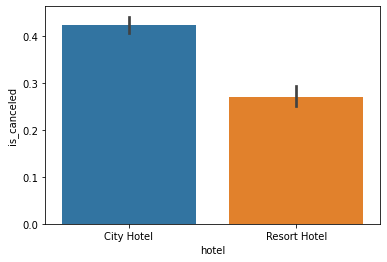

In [14]:
sns.barplot(x='hotel',y='is_canceled',data=df)
plt.show()

**Considering arrival_date_year**

In [15]:
df.arrival_date_year.value_counts()

2016    2377
2017    1700
2015     923
Name: arrival_date_year, dtype: int64

In [16]:
cross2=pd.crosstab(index=df['is_canceled'],columns=df['arrival_date_year'],margins=True)
cross2

arrival_date_year,2015,2016,2017,All
is_canceled,,,,
0,585,1502,1052,3139
1,338,875,648,1861
All,923,2377,1700,5000


In [17]:
res2=chi2_contingency(cross2)
print(res2[1])

0.98916458939428


As the target and independent variables are categorical,we have performed chi square test to check the acceptance of the variable.
**Hence the variable 'arrival_date_year' is more than the level of significance i.e.,(> 0.05), it is not a predictor**

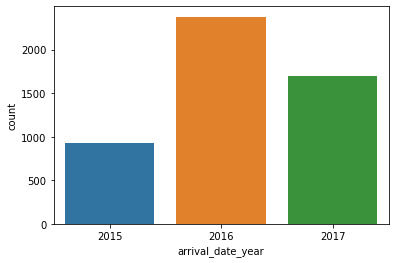

In [18]:
sns.countplot(df.arrival_date_year)
plt.xlabel('arrival_date_year')
plt.show()

**Instead of performing test for each variable, split the categorical variables and numerical variables and then apply test to check the acceptance of the variables**

In [19]:
categorical=df.select_dtypes(include='O')
categorical.columns

Index(['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country',
       'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'reservation_status'],
      dtype='object')

In [20]:
from scipy.stats import chi2_contingency
for i in categorical.columns:
    if i != 'is_canceled':
        mat=pd.crosstab(index=df[i],columns=df['is_canceled'])
        print(mat)
        chisquare=chi2_contingency(mat)
        print('P-value for ',i,' is ',chisquare[1])
        if chisquare[1]<0.05:
            print(i,' Variable will be a good predictor\n')
        else:
            print(i,' Variable will be a bad predictor\n')

is_canceled      0     1
hotel                   
City Hotel    1909  1406
Resort Hotel  1230   455
P-value for  hotel  is  2.29389961530605e-26
hotel  Variable will be a good predictor

is_canceled           0    1
arrival_date_month          
April               270  188
August              364  232
December            176   84
February            215  119
January             164   64
July                342  202
June                263  190
March               291  123
May                 302  208
November            188   82
October             286  187
September           278  182
P-value for  arrival_date_month  is  4.337615246421777e-05
arrival_date_month  Variable will be a good predictor

is_canceled     0     1
meal                   
BB           2395  1477
FB             14    16
HB            423   207
SC            277   159
Undefined      30     2
P-value for  meal  is  0.00011949579934375752
meal  Variable will be a good predictor

is_canceled   0   1
country           

**From the chi square test, we will check whether the categorical variable is good predictor or not**

**Visualizing the categorical variables**

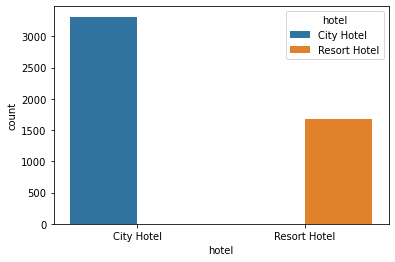

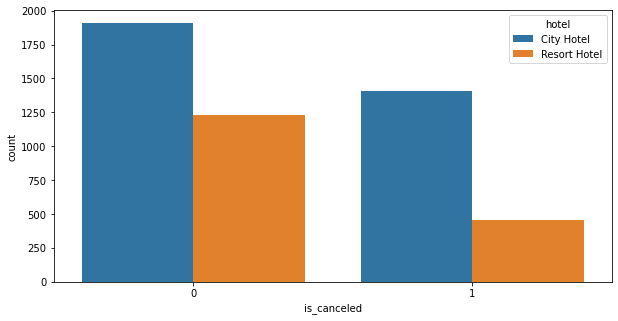

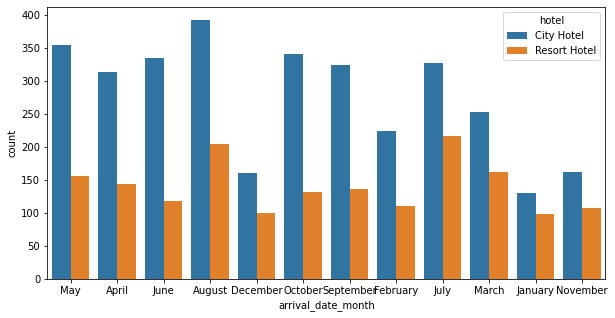

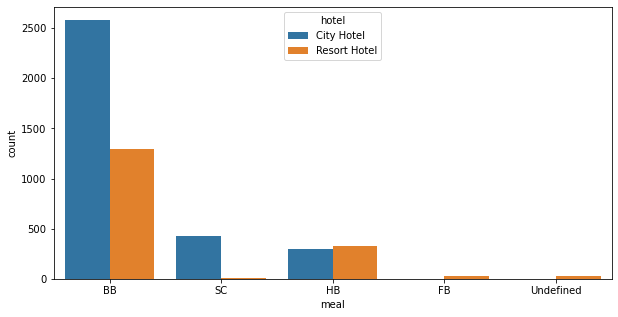

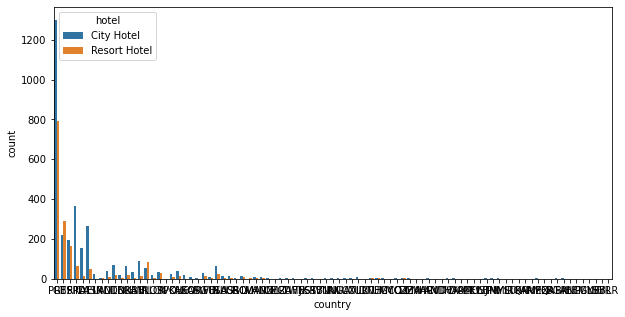

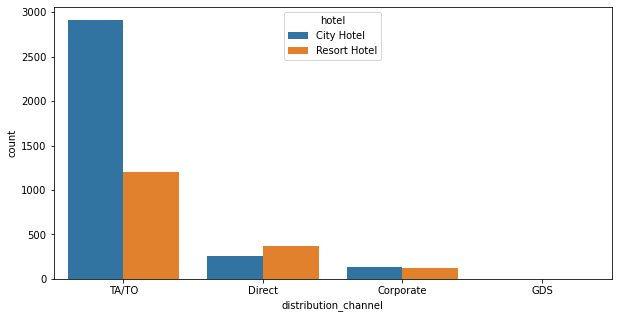

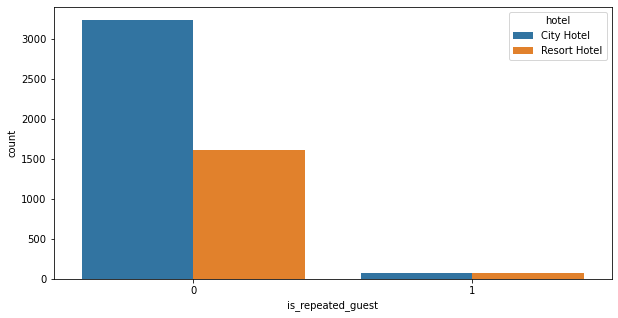

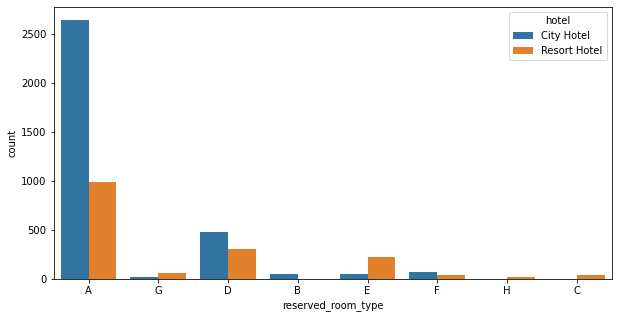

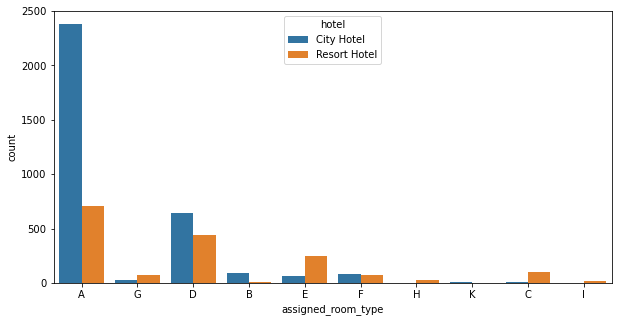

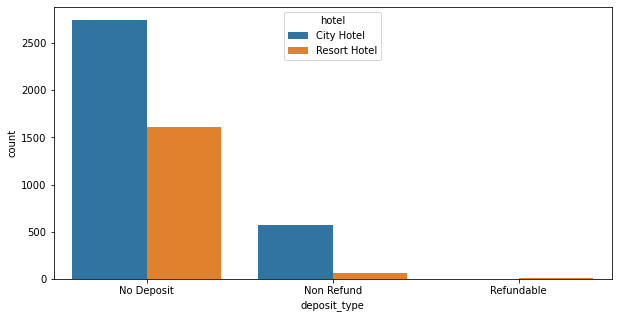

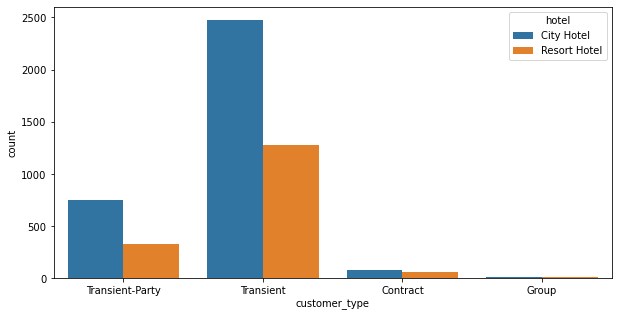

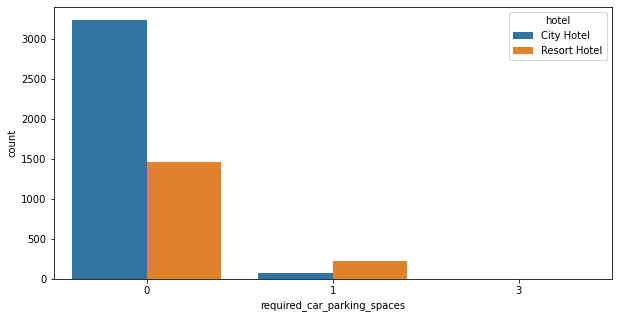

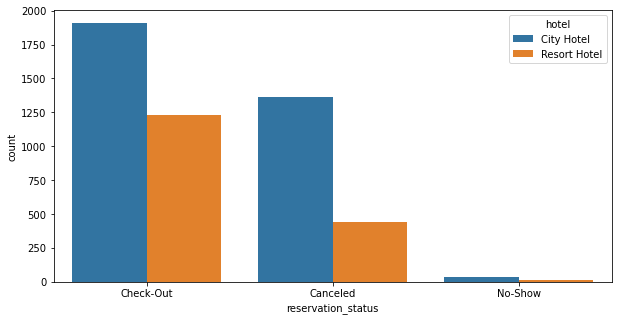

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in categorical.columns:
    sns.countplot(x=df[i],hue='hotel',data=df)
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.show()

In [22]:
numerical=df.select_dtypes(include=np.number)
numerical.columns

Index(['arrival_date_year', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
       'days_in_waiting_list'],
      dtype='object')

In [23]:
from scipy.stats import ttest_ind
for i in numerical:
    stats,p=ttest_ind(df[i],df['is_canceled'])
    print(p)

0.0
0.0
5.27579277331093e-261
0.0
0.0
1.2066788193553278e-179
0.0
9.068736910619017e-101
1.3274291817147522e-26
1.8870976204942785e-17


**Check for the Outliers**

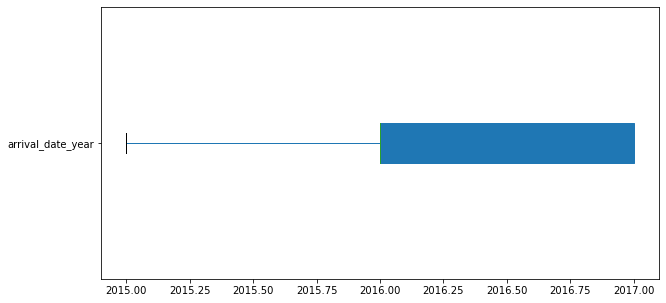

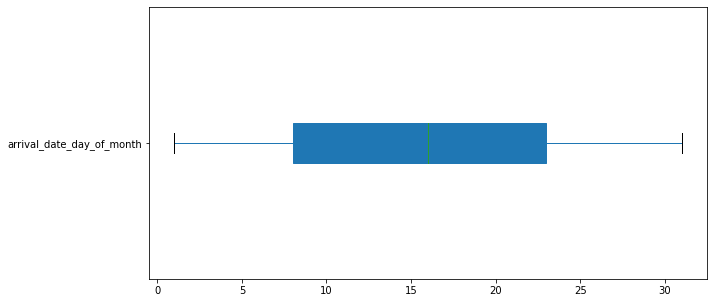

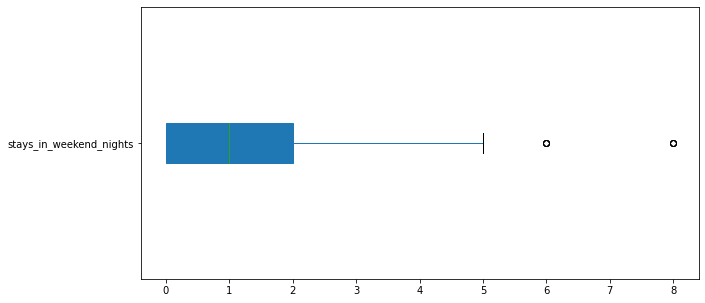

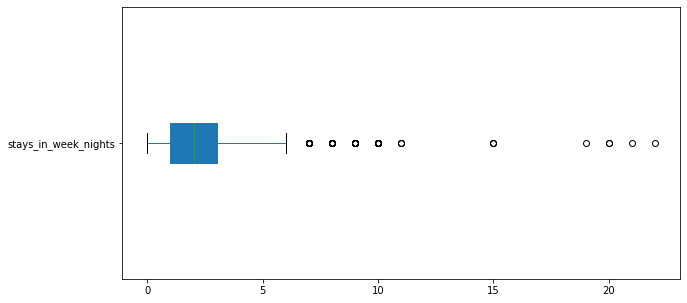

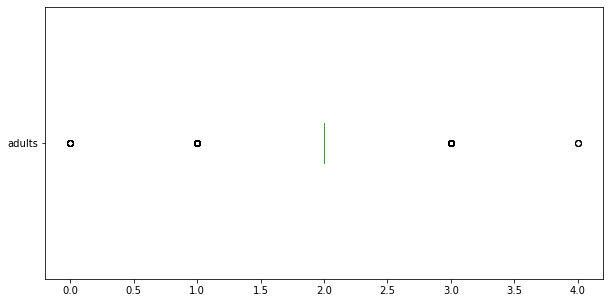

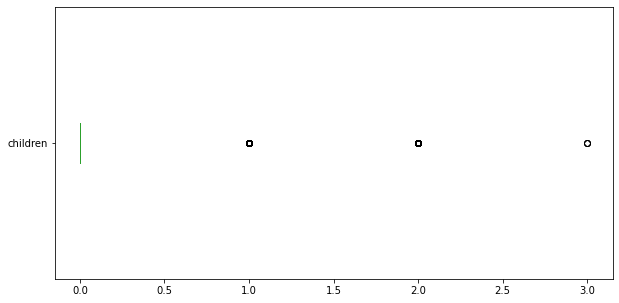

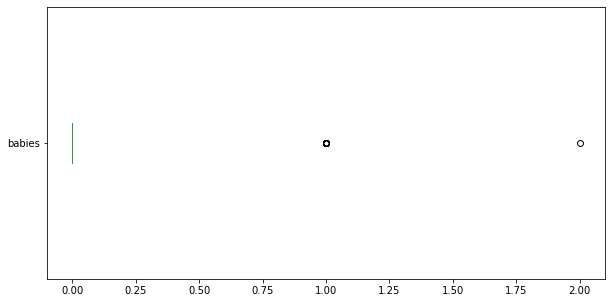

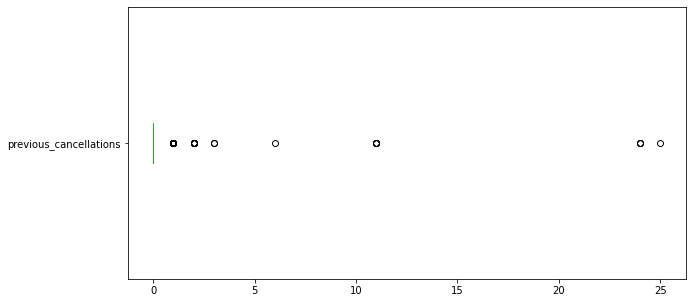

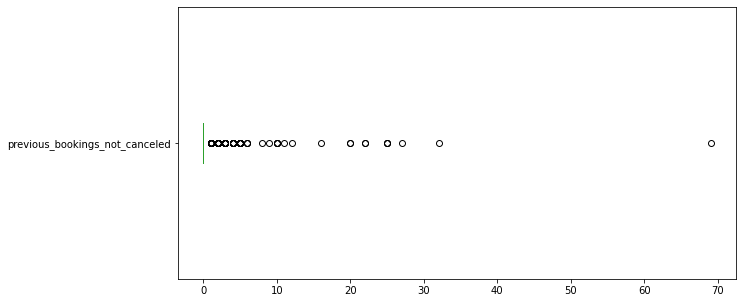

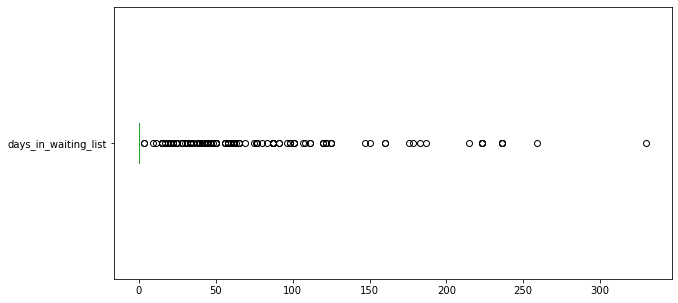

In [24]:
for a in numerical.columns:
    df[a].plot.box(patch_artist=True,vert=False)
    plt.show()

**Finding the Outliers**

In [25]:
for x in numerical:
    IQR=df[x].quantile(0.75)-df[x].quantile(0.25)
    print('IQR',IQR)

IQR 1.0
IQR 15.0
IQR 2.0
IQR 2.0
IQR 0.0
IQR 0.0
IQR 0.0
IQR 0.0
IQR 0.0
IQR 0.0


In [26]:
lowerend=df.days_in_waiting_list.quantile(0.25)
upperend=df.days_in_waiting_list.quantile(0.75)
print(lowerend)
print(upperend)

0.0
0.0


Drop the variable which are not useful in prediction

In [27]:
df=df.drop(['previous_cancellations'],axis=1)
df=df.drop(['days_in_waiting_list','previous_bookings_not_canceled'],axis=1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   hotel                        5000 non-null   object
 1   is_canceled                  5000 non-null   object
 2   arrival_date_year            5000 non-null   int64 
 3   arrival_date_month           5000 non-null   object
 4   arrival_date_day_of_month    5000 non-null   int64 
 5   stays_in_weekend_nights      5000 non-null   int64 
 6   stays_in_week_nights         5000 non-null   int64 
 7   adults                       5000 non-null   int64 
 8   children                     5000 non-null   int64 
 9   babies                       5000 non-null   int64 
 10  meal                         5000 non-null   object
 11  country                      5000 non-null   object
 12  distribution_channel         5000 non-null   object
 13  is_repeated_guest            5000

Separating the categorical variables

In [50]:
cat_var=df.select_dtypes(include='O')
cat_var=cat_var.drop(['is_canceled'],axis=1)
cat_var.head()

,hotel,arrival_date_month,meal,country,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,reservation_status
0,City Hotel,May,BB,PRT,TA/TO,0,A,A,No Deposit,Transient-Party,0,Check-Out
1,City Hotel,April,BB,GBR,Direct,0,A,A,No Deposit,Transient,0,Check-Out
2,City Hotel,June,BB,PRT,TA/TO,0,A,A,Non Refund,Transient,0,Canceled
3,City Hotel,August,SC,ESP,TA/TO,0,A,A,No Deposit,Transient,0,Check-Out
4,City Hotel,August,BB,FRA,TA/TO,0,G,G,No Deposit,Transient,0,Check-Out


In [51]:
cat_dum=pd.get_dummies(cat_var,drop_first=True)
cat_dum

,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,...,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,required_car_parking_spaces_1,required_car_parking_spaces_3,reservation_status_Check-Out,reservation_status_No-Show
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4996,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4997,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4998,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [54]:
num=df.select_dtypes(include=np.number)

In [55]:
new_df=pd.concat([cat_dum,num],axis=1)
new_df

,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,...,required_car_parking_spaces_3,reservation_status_Check-Out,reservation_status_No-Show,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,2017,5,0,1,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2017,7,0,1,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,2016,17,0,2,2,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,2016,16,0,3,2,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,2017,21,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2016,30,2,3,2,0,0
4996,1,0,0,0,0,1,0,0,0,0,...,0,0,0,2015,29,0,4,2,0,0
4997,1,1,0,0,0,0,0,0,0,0,...,0,1,0,2015,3,1,4,2,0,0
4998,0,0,0,0,0,0,0,0,0,1,...,0,0,0,2016,25,2,4,2,0,0


**Training the model**

In [56]:
X=new_df
Y=df['is_canceled']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [60]:
from sklearn.linear_model import LogisticRegression

In [66]:
model= LogisticRegression(solver='liblinear')
model.fit(x_train,y_train.astype(int))


LogisticRegression(solver='liblinear')

In [67]:
print('Coefficient of model :', model.coef_)
print('Intercept of model',model.intercept_)

Coefficient of model : [[-3.78120048e-01  8.84468431e-02 -7.17853903e-02 -8.07194926e-03
  -1.04179753e-01  4.23170835e-03  3.94278020e-02 -1.15421396e-01
   3.80254301e-02 -9.24392608e-02  3.02164885e-02  1.87987760e-02
   6.87849797e-03 -3.96709015e-02 -4.27738468e-04 -6.33745013e-02
  -2.66346396e-03  0.00000000e+00  1.28167832e-02 -4.46227313e-03
  -3.13799623e-02 -3.34642392e-02  0.00000000e+00 -1.02665230e-01
  -5.16370256e-03  3.74593522e-03  0.00000000e+00  5.05456932e-02
  -8.01379370e-03 -7.28111627e-03  7.10112683e-02 -4.63109517e-03
  -1.55097348e-03  2.69559473e-03 -3.14898385e-03 -2.53212411e-02
  -2.26294935e-01 -3.59804890e-02 -2.88942642e-03 -5.09943937e-03
  -8.28926472e-03 -8.50220869e-03  1.07149440e-02 -1.43803707e-04
  -3.32514362e-02 -2.11175035e-01 -1.28298235e-01  0.00000000e+00
   4.09069106e-03 -7.96987392e-03 -1.33269276e-02  7.75864787e-03
  -1.10763396e-02 -2.94311176e-02 -2.06949464e-03  0.00000000e+00
  -2.09775258e-03  8.55875262e-02  5.62438719e-03  2.

In [68]:
ypredict = model.predict(x_test)
ypredict


array([0, 0, 1, ..., 0, 1, 0])

In [70]:
print(classification_report(y_test.astype(int),ypredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       948
           1       1.00      1.00      1.00       552

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



**Above result we got is without standard scalar**

In [71]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [73]:
std_scaler=StandardScaler()
std_scaler.fit(x_train)
x_train_std=std_scaler.transform(x_train)
x_test_std=std_scaler.transform(x_test)

In [75]:
model=LogisticRegression(solver='liblinear')
model.fit(x_train_std,y_train.astype(int))

ypred=model.predict(x_test)



In [79]:
print(classification_report(y_test.astype(int),ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       948
           1       0.37      1.00      0.54       552

    accuracy                           0.37      1500
   macro avg       0.18      0.50      0.27      1500
weighted avg       0.14      0.37      0.20      1500

